In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [5]:
#Get Data
data = np.array([[5, 9.000, 0.04],
                 [10, 7.040, 0.04],
                 [15, 3.520, 0.04],
                 [20, 1.800, 0.04],
                 [25, 0.980, 0.04],
                 [30, 0.512, 0.02],
                 [35, 0.284, 0.020],
                 [40, 0.170, 0.030],
                 [45, 0.120, 0.020],
                 [50, 0.070, 0.020],
                 [55, 0.015, 0.010],
                 [60, 0.010, 0.005]])


data

array([[5.00e+00, 9.00e+00, 4.00e-02],
       [1.00e+01, 7.04e+00, 4.00e-02],
       [1.50e+01, 3.52e+00, 4.00e-02],
       [2.00e+01, 1.80e+00, 4.00e-02],
       [2.50e+01, 9.80e-01, 4.00e-02],
       [3.00e+01, 5.12e-01, 2.00e-02],
       [3.50e+01, 2.84e-01, 2.00e-02],
       [4.00e+01, 1.70e-01, 3.00e-02],
       [4.50e+01, 1.20e-01, 2.00e-02],
       [5.00e+01, 7.00e-02, 2.00e-02],
       [5.50e+01, 1.50e-02, 1.00e-02],
       [6.00e+01, 1.00e-02, 5.00e-03]])

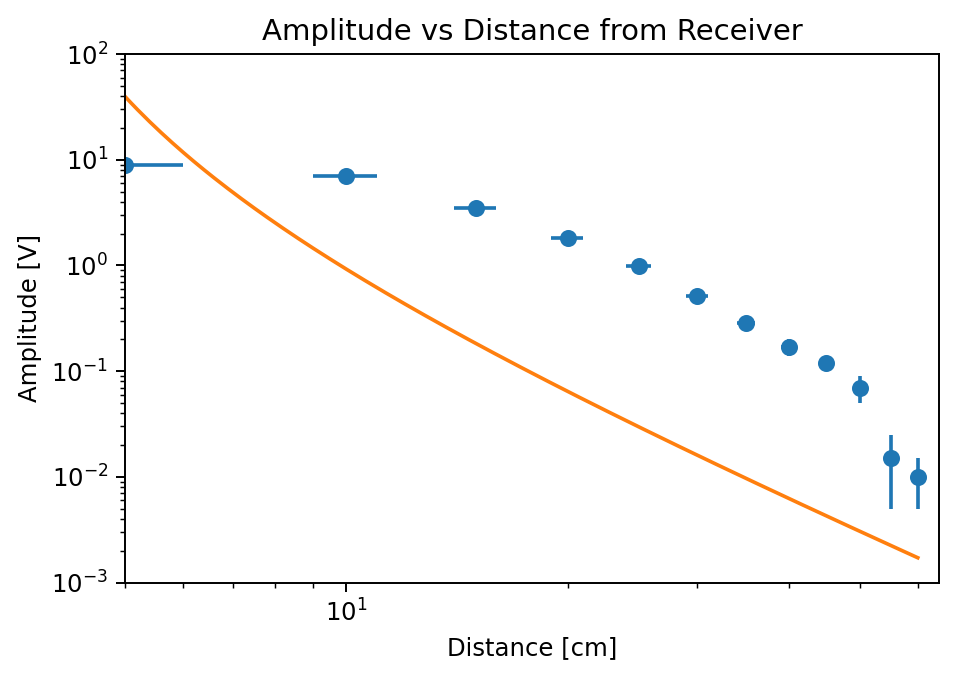

In [40]:
plt.figure(dpi=175)
plt.title("Amplitude vs Distance from Receiver")
plt.xlabel("Distance [cm]")
plt.ylabel("Amplitude [V]")

plt.errorbar(data[:,0],data[:,1], xerr=1, yerr=data[:,2], fmt="o")

x = np.arange(1,60,.1)
plt.plot(x, 10**2.5*(x-3)**(-3))
#plt.plot(x, 8*(x)**(-5))
plt.xlim(left=5)
plt.ylim(.001,100)

plt.xscale("log")
plt.yscale("log")

[ 9.99999566e+03 -3.08045913e+00 -2.81261279e+00  1.00000000e+00]
[3.76949462e+04 6.63212609e+00 9.22472376e-01 0.00000000e+00]
[376.94962534 215.2966752   32.79770255   0.        ]


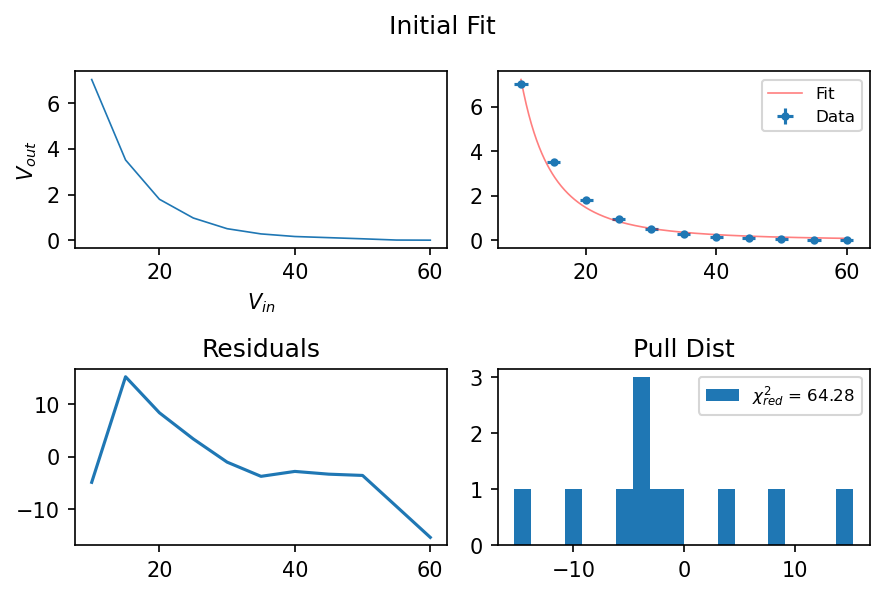

CPU times: user 443 ms, sys: 60.6 ms, total: 503 ms
Wall time: 516 ms


In [29]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def exp_func(x, a,b,n, c):
    return a*(x-b)**n + c*0

func = exp_func

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("$V_{in}$")
plt.ylabel("$V_{out}$")

skip=1

keeps = data[skip:,1] > 0 #(raw_data1["v_in"] > .4) & (raw_data1["v_in"] < 1.4)

distance = data[skip:,0][keeps]
amp = data[skip:,1][keeps]

plt.plot(distance, amp, lw=.8)

errors = data[skip:,2]

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, out_in.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, distance, amp, maxfev=3*10**5, sigma=errors,
                                     p0=[8,1,-2,1],#1],#1], #[3,460,20, 1],
                                     bounds=([0.01,-10,-10, 0],
                                             [10000,10,-1, 1.5])
                                    )
#Mean Lines
#plt.vlines(pars[-2],1,5, label=f"{pars[-2]:.1f} ({np.sqrt(cov.diagonal())[-2]:.1f})", color="blue", lw=0.5)

#plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(10,60,0.1)
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(distance, amp, xerr=1, yerr=errors, ms=3, label="Data", fmt="o")
plt.plot(x, func(x, *pars), color="red", lw=.8, alpha=0.5, label=f"Fit")#: ({pars[-2]:.2f})")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (amp-func(distance, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(distance, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
#plt.savefig(f"Plots/SiDiode_Forward_Positive_Fit.pdf")
plt.show()

In [8]:
distance

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.])

In [9]:
np.log10(data[skip:,2])

array([-1.39794001, -1.39794001, -1.39794001, -1.39794001, -1.39794001,
       -1.69897   , -1.69897   , -1.52287875, -1.69897   , -1.69897   ,
       -2.        , -2.30103   ])

[-3.33329135  4.57834084]
[0.14071211 0.21511207]
[4.22141657 4.69847211]


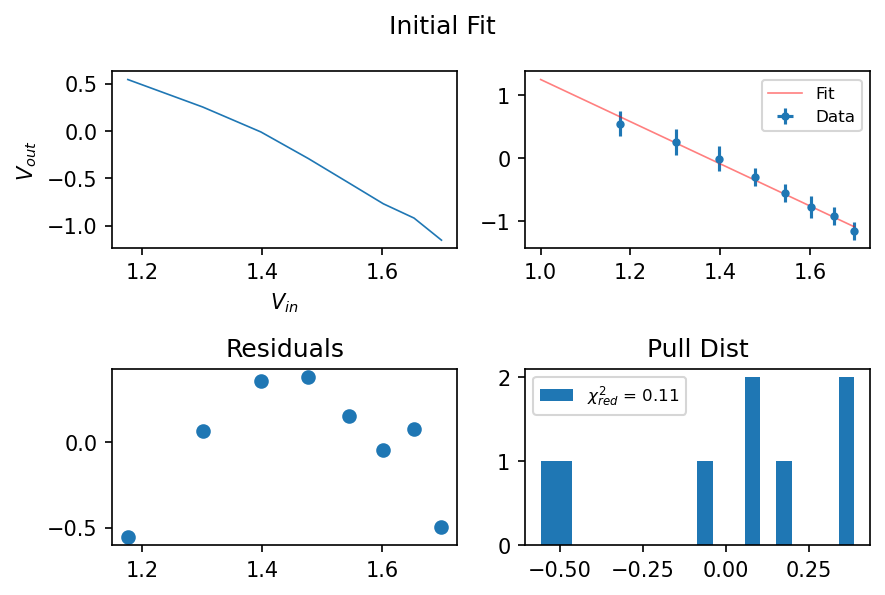

CPU times: user 439 ms, sys: 65.7 ms, total: 505 ms
Wall time: 549 ms


In [21]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def linear(x, a,b):
    return a*x + b

func = linear

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("$V_{in}$")
plt.ylabel("$V_{out}$")

skip=2
end=-2

keeps = data[skip:end,1] > 0 #(raw_data1["v_in"] > .4) & (raw_data1["v_in"] < 1.4)

distance = np.log10(data[skip:end,0][keeps])
amp = np.log10(data[skip:end,1][keeps])

plt.plot(distance, amp, lw=.8)

errors = np.sqrt(data[skip:end,2])

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, out_in.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, distance, amp, maxfev=3*10**5, sigma=errors,
                                     p0=[-2,1],#1],#1], #[3,460,20, 1],
                                     bounds=([-100,-10],
                                             [100,10])
                                    )
#Mean Lines
#plt.vlines(pars[-2],1,5, label=f"{pars[-2]:.1f} ({np.sqrt(cov.diagonal())[-2]:.1f})", color="blue", lw=0.5)

#plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.log10(np.arange(10,50,0.1))
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(distance, amp, xerr=np.log10(1), yerr=errors, ms=3, label="Data", fmt="o")
plt.plot(x, func(x, *pars), color="red", lw=.8, alpha=0.5, label=f"Fit")#: ({pars[-2]:.2f})")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (amp-func(distance, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.scatter(distance, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
#plt.savefig(f"Plots/SiDiode_Forward_Positive_Fit.pdf")
plt.show()

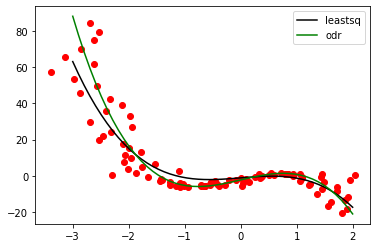

In [10]:
from scipy.odr import ODR, Model, Data, RealData
import numpy as np
from pylab import *

def func(beta, x):
    y = beta[0]+beta[1]*x+beta[2]*x**3
    return y

#generate data
x = np.linspace(-3,2,100)
y = func([-2.3,7.0,-4.0], x)

# add some noise
x += np.random.normal(scale=0.3, size=100)
y += np.random.normal(scale=0.1, size=100)

data = RealData(x, y, 0.3, 0.1)
model = Model(func)

odr = ODR(data, model, [1,0,0])
odr.set_job(fit_type=2)
output = odr.run()

xn = np.linspace(-3,2,50)
yn = func(output.beta, xn)
#hold(True)
plot(x,y,'ro')
plot(xn,yn,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
yn = func(output.beta, xn)
plot(xn,yn,'g-',label='odr')
legend(loc=0)

In [56]:
#Get Data
data = np.array([[20, 3.000, 0.500],
                 [22, 1.600, 0.200],
                 [24, 1.100, 0.200],
                 [25, 0.800, 0.050],
                 [26, 0.640, 0.040],
                 [28, 0.510, 0.030],
                 [30, 0.270, 0.050],
                 [35, 0.200, 0.050],
                 [40, 0.020, 0.005]])

data

array([[2.0e+01, 3.0e+00, 5.0e-01],
       [2.2e+01, 1.6e+00, 2.0e-01],
       [2.4e+01, 1.1e+00, 2.0e-01],
       [2.5e+01, 8.0e-01, 5.0e-02],
       [2.6e+01, 6.4e-01, 4.0e-02],
       [2.8e+01, 5.1e-01, 3.0e-02],
       [3.0e+01, 2.7e-01, 5.0e-02],
       [3.5e+01, 2.0e-01, 5.0e-02],
       [4.0e+01, 2.0e-02, 5.0e-03]])

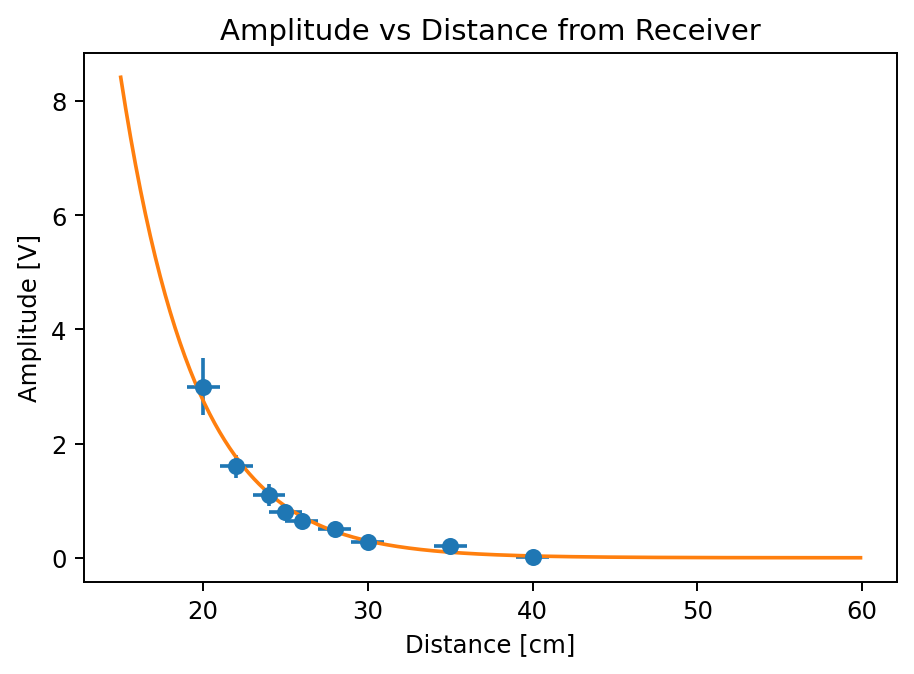

In [98]:
plt.figure(dpi=175)
plt.title("Amplitude vs Distance from Receiver")
plt.xlabel("Distance [cm]")
plt.ylabel("Amplitude [V]")

plt.errorbar(data[:,0],data[:,1], xerr=1, yerr=data[:,2], fmt="o")

x = np.arange(15,60,.1)
#plt.plot(x, 10**2.5*(x-3)**(-3))
plt.plot(x, 10**(-0.09698756*x+2.37997635))
#plt.xlim(left=5)
#plt.ylim(.001,100)

#plt.xscale("log")
#plt.yscale("log")

[2377.66280617   10.63190143 7136.26590087]
[1.50553794e+03 5.16563354e+00 2.34883611e+05]
[  63.32007793   48.58616842 3291.40777683]


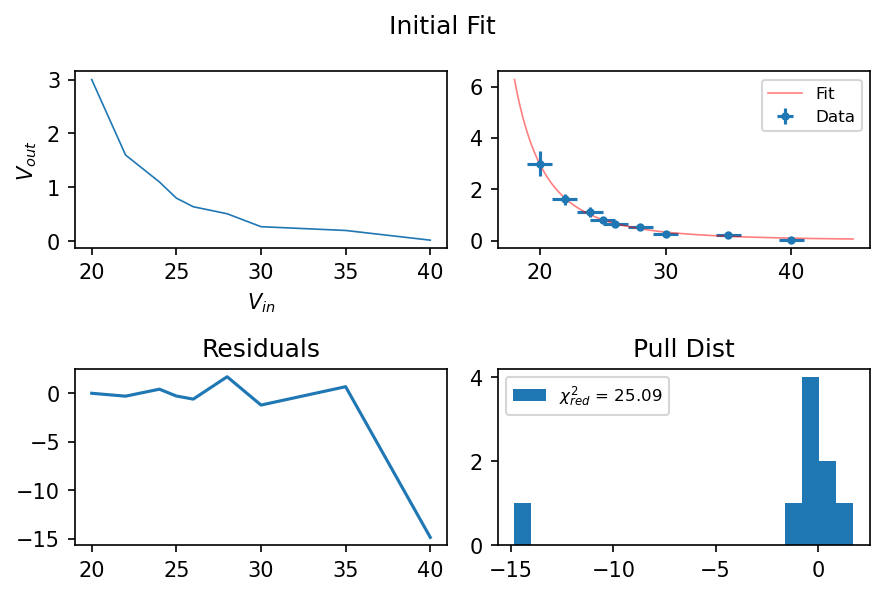

CPU times: user 447 ms, sys: 78 ms, total: 525 ms
Wall time: 540 ms


In [99]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def exp_func(x, a,b,n):
    return a*(x-b)**n

def fit_func(x, a,b, c):
    return a*(x-b)**-3 + c*(x-b)**-5

func = fit_func

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("$V_{in}$")
plt.ylabel("$V_{out}$")

skip=0

keeps = data[skip:,1] > 0 #(raw_data1["v_in"] > .4) & (raw_data1["v_in"] < 1.4)

distance = data[skip:,0][keeps]
amp = data[skip:,1][keeps]

plt.plot(distance, amp, lw=.8)

errors = data[skip:,2]

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, out_in.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, distance, amp, maxfev=3*10**5, #sigma=errors,
                                     p0=[10,1, 10],#1],#1], #[3,460,20, 1],
                                     bounds=([0.01,-100, 0.01],
                                             [10**4,100, 10**4])
                                    )
#Mean Lines
#plt.vlines(pars[-2],1,5, label=f"{pars[-2]:.1f} ({np.sqrt(cov.diagonal())[-2]:.1f})", color="blue", lw=0.5)

#plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(18,45,0.1)
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(distance, amp, xerr=1, yerr=errors, ms=3, label="Data", fmt="o")
plt.plot(x, func(x, *pars), color="red", lw=.8, alpha=0.5, label=f"Fit")#: ({pars[-2]:.2f})")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (amp-func(distance, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(distance, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
#plt.savefig(f"Plots/SiDiode_Forward_Positive_Fit.pdf")
plt.show()

[-0.09698756  2.37997635]
[0.00815294 0.2317181 ]
[8.40616648 9.73615138]


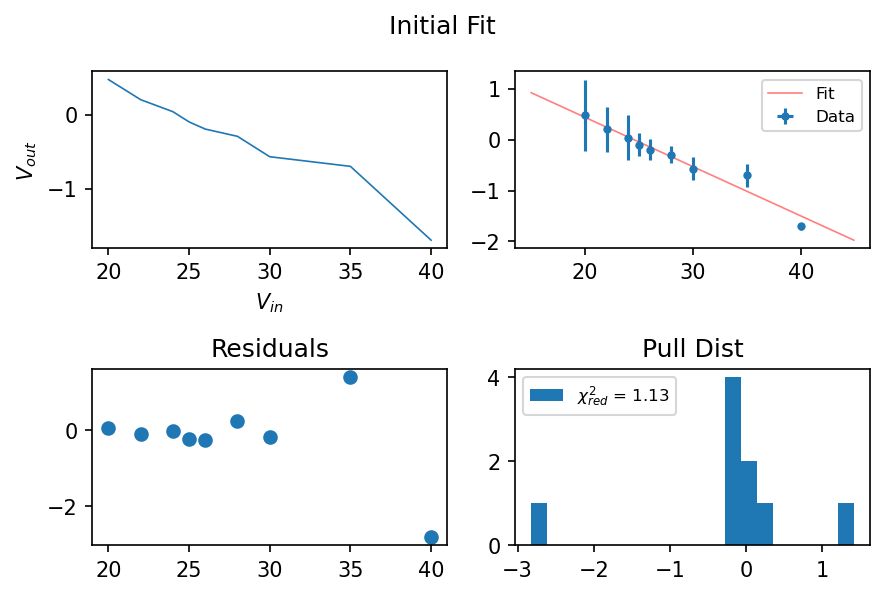

CPU times: user 439 ms, sys: 70 ms, total: 509 ms
Wall time: 522 ms


In [96]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def linear(x, a,b):
    return a*x + b

func = linear

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("$V_{in}$")
plt.ylabel("$V_{out}$")

skip=0

keeps = data[skip:,1] > 0 #(raw_data1["v_in"] > .4) & (raw_data1["v_in"] < 1.4)

distance = 10**np.log10(data[skip:,0][keeps])
amp = np.log10(data[skip:,1][keeps])

plt.plot(distance, amp, lw=.8)
errors = np.sqrt(data[skip:,2])

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, out_in.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, distance, amp, maxfev=3*10**5, #sigma=errors,
                                     p0=[-2,1],#1],#1], #[3,460,20, 1],
                                     bounds=([-100,-10],
                                             [100,10])
                                    )
#Mean Lines
#plt.vlines(pars[-2],1,5, label=f"{pars[-2]:.1f} ({np.sqrt(cov.diagonal())[-2]:.1f})", color="blue", lw=0.5)

#plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = 10**np.log10(np.arange(15,45,0.1))
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(distance, amp, xerr=np.log10(1), yerr=errors, ms=3, label="Data", fmt="o")
plt.plot(x, func(x, *pars), color="red", lw=.8, alpha=0.5, label=f"Fit")#: ({pars[-2]:.2f})")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (amp-func(distance, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.scatter(distance, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
#plt.savefig(f"Plots/SiDiode_Forward_Positive_Fit.pdf")
plt.show()